In [262]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import scipy as sp
import os
import xgboost as xgb
%matplotlib inline

Let's load the data into pandas dataframes

In [300]:
train = pd.read_csv("./train.csv", parse_dates = ['timestamp'])
print train.shape
test = pd.read_csv("./test.csv", parse_dates = ['timestamp'])
print test.shape
macro = pd.read_csv("./macro.csv", parse_dates = ['timestamp'])
print macro.shape
train.head()

(30471, 292)
(7662, 291)
(2484, 100)


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [301]:
macro.head()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,brent,net_capital_export,gdp_annual,gdp_annual_growth,average_provision_of_build_contract,average_provision_of_build_contract_moscow,rts,micex,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,grp,grp_growth,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,invest_fixed_capital_per_cap,invest_fixed_assets,profitable_enterpr_share,unprofitable_enterpr_share,share_own_revenues,overdue_wages_per_cap,fin_res_per_cap,marriages_per_1000_cap,divorce_rate,construction_value,invest_fixed_assets_phys,pop_natural_increase,pop_migration,pop_total_inc,childbirth,mortality,housing_fund_sqm,lodging_sqm_per_cap,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,NaN,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,175.15,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,178.66,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,43.4054,80.12,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,183.44,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.

In [302]:
house_train = train.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,13,291]]

In [303]:
house_train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,6.407578e+06,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,9.589337e+06,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.808270e+06,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,1.258354e+07,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,8.398461e+06,16331452


In [304]:
house_test = test.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,13]]

In [305]:
house_test.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,3.0,2.615514e+07
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,1.0,2.553630e+07
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,2.0,9.946335e+06
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,3.0,2.149409e+07
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,1.0,2.553630e+07


In [306]:
house_test.values

array([[30474, Timestamp('2015-07-01 00:00:00'), 39.0, ..., 8.9, 3.0,
        26155137.04],
       [30475, Timestamp('2015-07-01 00:00:00'), 79.2, ..., 1.0, 1.0,
        25536296.81],
       [30476, Timestamp('2015-07-01 00:00:00'), 40.5, ..., 4.8, 2.0,
        9946335.108],
       ..., 
       [38133, Timestamp('2016-05-30 00:00:00'), 41.08, ..., 1.0, 1.0,
        7307410.574],
       [38134, Timestamp('2016-05-30 00:00:00'), 34.8, ..., 6.4, 2.0,
        7128794.3379999995],
       [38135, Timestamp('2016-05-30 00:00:00'), 63.0, ..., 7.1, 3.0,
        6206098.885]], dtype=object)

In [307]:
house_test.shape

(7662, 12)

In [308]:
house_train.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,3.047100e+04,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,1.765705e+07,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,2.064961e+07,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,2.081628e+06,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,7.307411e+06,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,1.050803e+07,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,1.803644e+07,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,2.060718e+08,1.111111e+08


In [309]:
# check number of missing values per column
np.sum(house_train.isnull())

id                0
timestamp         0
full_sq           0
life_sq        6383
floor           167
max_floor      9572
material       9572
build_year    13605
num_room       9572
kitch_sq       9572
state         13559
area_m            0
price_doc         0
dtype: int64

Oof. Okay, let's take care of these as we go along. First, look at price.

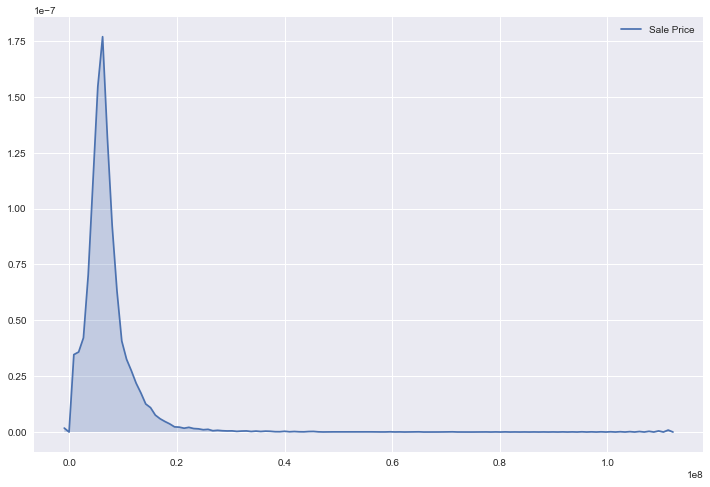

In [310]:
plt.figure(figsize=(12,8))
sns.kdeplot(house_train['price_doc'], shade=True, label='Sale Price')

Skewed way right. Let's log this to normalize.

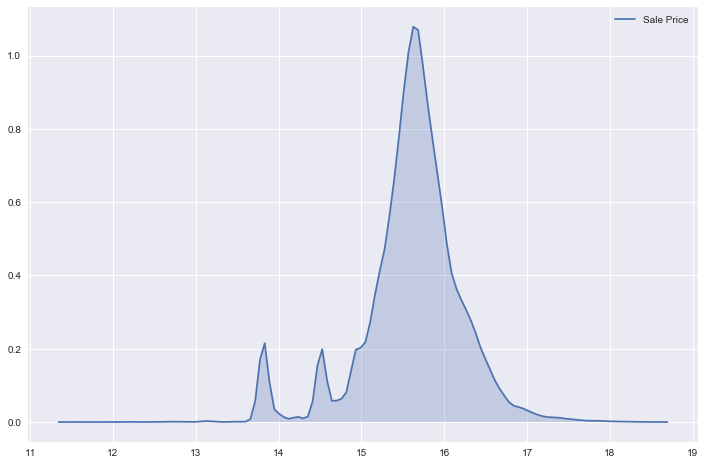

In [311]:
plt.figure(figsize=(12,8))
sns.kdeplot(np.log(house_train['price_doc']), shade=True, label='Sale Price')

Looks better. Forget about dates for now, let's do a correlation plot...maybe we can join some interesting variables from the macro dataset as well?

Look at dates first. are they unique?

In [312]:
house_train.groupby("timestamp").agg(['count'])[[1]]

,full_sq
,count
timestamp,
2011-08-20,1
2011-08-23,1
2011-08-27,1
2011-09-01,1
2011-09-05,1
2011-09-06,1
2011-09-08,1
2011-09-09,1


Okay. Let's look at macros dataset, specifically gdp_quart (GDP), deposits_value (Volume of household deposits), deposits_growth (Volume growth of population's deposits), deposits_rate (Average interest rate on deposits), mortgage_value (Volume of mortgage loans), mortgage_growth (Growth of mortgage lending), mortgage_rate (Weighted average rate of mortgage loans), salary, unemployment (Unemployment rate), and employment (Employment rate).

In [313]:
macro_set = macro.loc[:,['timestamp', 'gdp_quart', 'deposits_value', 'deposits_growth', 'deposits_rate', 'mortgage_value', 
             'mortgage_growth', 'mortgage_rate', 'salary', 'unemployment', 'employment']]

In [314]:
macro_set.head(10)

,timestamp,gdp_quart,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,salary,unemployment,employment
0,2010-01-01,NaN,7484970,NaN,NaN,142968,NaN,13.72,38410.5,0.018,0.69
1,2010-01-02,NaN,7484970,NaN,NaN,142968,NaN,13.72,38410.5,0.018,0.69
2,2010-01-03,NaN,7484970,NaN,NaN,142968,NaN,13.72,38410.5,0.018,0.69
3,2010-01-04,NaN,7484970,NaN,NaN,142968,NaN,13.72,38410.5,0.018,0.69
4,2010-01-05,NaN,7484970,NaN,NaN,142968,NaN,13.72,38410.5,0.018,0.69
5,2010-01-06,NaN,7484970,NaN,NaN,142968,NaN,13.72,38410.5,0.018,0.69
6,2010-01-07,NaN,7484970,NaN,NaN,142968,NaN,13.72,38410.5,0.018,0.69
7,2010-01-08,NaN,7484970,NaN,NaN,142968,NaN,13.72,38410.5,0.018,0.69
8,2010-01-09,NaN,7484970,NaN,NaN,142968,NaN,13.72,38410.5,0.018,0.69
9,2010-01-10,NaN,7484970,NaN,NaN,142968,NaN,13.72,38410.5,0.018,0.69


In [315]:
macro_set.shape

(2484, 11)

Check for duplicates

In [316]:
np.sum(macro_set.isnull())

timestamp            0
gdp_quart           90
deposits_value       0
deposits_growth     31
deposits_rate      414
mortgage_value       0
mortgage_growth    365
mortgage_rate        0
salary             293
unemployment       293
employment         293
dtype: int64

See if the timestamps are duplicated.

In [317]:
macro_set[macro_set.duplicated(['timestamp'], keep=False)]

,timestamp,gdp_quart,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,salary,unemployment,employment


Negative. Okay, now join with house_train.

In [318]:
train_full = pd.merge(house_train, macro_set, how = 'left', on = 'timestamp')

In [319]:
test_full = pd.merge(house_test, macro_set, how = 'left', on = 'timestamp')

In [320]:
train_full.shape

(30471, 23)

In [321]:
test_full.shape

(7662, 22)

In [322]:
pd.set_option('display.max_columns', None)

In [323]:
train_full.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,price_doc,gdp_quart,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,salary,unemployment,employment
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,6.407578e+06,5850000,14313.7,10618898,0.009740,4.1,323275,1.051914,11.84,44898.7,0.014,0.708
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,9.589337e+06,6000000,14313.7,10618898,0.009740,4.1,323275,1.051914,11.84,44898.7,0.014,0.708
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.808270e+06,5700000,14313.7,10618898,0.009740,4.1,323275,1.051914,11.84,44898.7,0.014,0.708
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,1.258354e+07,13100000,14313.7,10720911,0.009607,4.0,386388,1.049543,11.92,44898.7,0.014,0.708
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,8.398461e+06,16331452,14313.7,10920215,0.018590,4.0,386388,1.049543,11.92,44898.7,0.014,0.708


Do a correlation matrix (without dates or feature engineering) before anything. See what this all looks like.

In [324]:
train_full.corr()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,price_doc,gdp_quart,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,salary,unemployment,employment
id,1.000000,0.021447,0.014478,-0.022523,0.007037,0.008507,-0.012726,0.014387,-0.010414,-0.119621,0.063572,0.121203,0.727085,0.947735,-0.118562,0.596970,0.328689,-0.643538,0.546162,0.916777,0.542734,0.820961
full_sq,0.021447,1.000000,0.161112,0.089649,0.119225,0.032866,-0.006041,0.695444,0.020026,-0.091348,0.056303,0.341840,0.009168,0.021411,-0.010348,0.018562,-0.007548,-0.027592,0.028893,0.019381,0.005168,0.012200
life_sq,0.014478,0.161112,1.000000,0.045090,0.042442,0.011393,-0.002401,0.191024,0.000633,-0.066633,0.061395,0.165606,0.010156,0.018471,0.001162,0.014448,0.005760,-0.028173,0.021963,0.012301,0.019434,-0.000790
floor,-0.022523,0.089649,0.045090,1.000000,0.454488,-0.009043,0.001192,-0.005657,-0.008457,-0.113906,-0.019448,0.117447,-0.017543,-0.011555,0.008238,-0.004236,-0.002085,-0.020470,0.012136,-0.018316,-0.001478,-0.031421
max_floor,0.007037,0.119225,0.042442,0.454488,1.000000,0.045915,-0.000261,-0.014220,0.020345,-0.072161,-0.092954,0.094386,0.005801,0.010462,0.013269,0.012215,0.013411,-0.009118,0.002363,0.003223,0.006957,-0.002222
material,0.008507,0.032866,0.011393,-0.009043,0.045915,1.000000,-0.004402,-0.026924,0.038747,-0.034225,0.001182,0.064047,-0.007624,0.009972,-0.002760,0.002440,-0.000293,-0.022843,0.015855,-0.001127,0.018206,-0.012417
build_year,-0.012726,-0.006041,-0.002401,0.001192,-0.000261,-0.004402,1.000000,-0.008251,0.000596,0.295053,-0.004572,0.002161,-0.010954,-0.010059,-0.003501,-0.004390,-0.001999,-0.000288,-0.001725,-0.014657,0.008276,-0.015347
num_room,0.014387,0.695444,0.191024,-0.005657,-0.014220,-0.026924,-0.008251,1.000000,0.016950,0.082027,-0.040841,0.476337,0.000650,0.020144,-0.011575,0.015662,-0.026661,-0.020581,0.024743,0.018167,0.023206,-0.002290
kitch_sq,-0.010414,0.020026,0.000633,-0.008457,0.020345,0.038747,0.000596,0.016950,1.000000,0.048695,-0.023425,0.028718,-0.001733,-0.006714,-0.004957,-0.001454,-0.003223,-0.003044,0.001777,-0.012500,0.012855,-0.016851
state,-0.119621,-0.091348,-0.066633,-0.113906,-0.072161,-0.034225,0.295053,0.082027,0.048695,1.000000,-0.295207,0.121303,-0.047004,-0.121228,-0.003551,-0.081834,0.001940,0.102127,-0.099315,-0.096228,-0.040993,-0.040265


Alright, I'm gonna experiment with XGBoost for the first time, so this might get ugly. I'm basing my analysis off of this guy's kernel: https://www.kaggle.com/christopherfrank/simple-xgb-wfeatures-0-325lb/notebook. Shout out to this guy.

Let's featurize the data.

In [325]:
from sklearn.preprocessing import LabelEncoder

def encode_object_features(train, test):
    '''(DataFrame, DataFrame) -> DataFrame, DataFrame
    
    Will encode each non-numerical column.
    '''
    train = pd.DataFrame(train)
    test = pd.DataFrame(test)
    cols_to_encode = train.select_dtypes(include=['object'], exclude=['int64', 'float64']).columns
    for col in cols_to_encode:
        le = LabelEncoder()
        #Fit encoder
        le.fit(list(train[col].values.astype('str')) + list(test[col].values.astype('str')))
        #Transform
        train[col] = le.transform(list(train[col].values.astype('str')))
        test[col] = le.transform(list(test[col].values.astype('str')))
    
    return train, test

In [326]:
train_df, test_df = encode_object_features(train_full, test_full)

In [327]:
## Take the log of the price
#def logify_price(df):
#    df['log_price_doc'] = np.log1p(df['price_doc'].values)
#    df.drop('price_doc', axis=1, inplace=True)
#    return df

# This seems to mutate the column, but an error occurs. try throwing an exception
# it's cuz test set doesn't have price dude.

In [328]:
#np.log1p(train_full['price_doc'].values)
#train_full.head()
#train_df = logify_price(train_df)

In [329]:
train_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,gdp_quart,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,salary,unemployment,employment,log_price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,6.407578e+06,14313.7,10618898,0.009740,4.1,323275,1.051914,11.84,44898.7,0.014,0.708,15.581952
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,9.589337e+06,14313.7,10618898,0.009740,4.1,323275,1.051914,11.84,44898.7,0.014,0.708,15.607270
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.808270e+06,14313.7,10618898,0.009740,4.1,323275,1.051914,11.84,44898.7,0.014,0.708,15.555977
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,1.258354e+07,14313.7,10720911,0.009607,4.0,386388,1.049543,11.92,44898.7,0.014,0.708,16.388123
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,8.398461e+06,14313.7,10920215,0.018590,4.0,386388,1.049543,11.92,44898.7,0.014,0.708,16.608603


In [330]:
# Do stuff with the date
def add_date_features(df):
    '''(DataFrame) -> DataFrame
    
    Will add some specific columns based on the date
    of the sale.
    '''
    #Convert to datetime to make extraction easier
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    #Extract features
    df['month'] = df['timestamp'].dt.month
    df['day'] = df['timestamp'].dt.day
    df['year'] = df['timestamp'].dt.year
    
    #These features inspired by Bruno's Notebook at https://www.kaggle.com/bguberfain/naive-xgb-lb-0-317
    #Month-Year
    month_year = df['timestamp'].dt.month + df['timestamp'].dt.year * 100
    month_year_map = month_year.value_counts().to_dict()
    df['month_year'] = month_year.map(month_year_map)
    #Week-Year
    week_year = df['timestamp'].dt.weekofyear + df['timestamp'].dt.year * 100
    week_year_map = week_year.value_counts().to_dict()
    df['week_year'] = week_year.map(week_year_map)
    df.drop('timestamp', axis=1, inplace=True)
    return df

In [331]:
train_df = add_date_features(train_df)

In [332]:
train_df.head()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,gdp_quart,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,salary,unemployment,employment,log_price_doc,month,day,year,month_year,week_year
0,1,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,6.407578e+06,14313.7,10618898,0.009740,4.1,323275,1.051914,11.84,44898.7,0.014,0.708,15.581952,8,20,2011,3,1
1,2,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,9.589337e+06,14313.7,10618898,0.009740,4.1,323275,1.051914,11.84,44898.7,0.014,0.708,15.607270,8,23,2011,3,2
2,3,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.808270e+06,14313.7,10618898,0.009740,4.1,323275,1.051914,11.84,44898.7,0.014,0.708,15.555977,8,27,2011,3,2
3,4,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,1.258354e+07,14313.7,10720911,0.009607,4.0,386388,1.049543,11.92,44898.7,0.014,0.708,16.388123,9,1,2011,39,1
4,5,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,8.398461e+06,14313.7,10920215,0.018590,4.0,386388,1.049543,11.92,44898.7,0.014,0.708,16.608603,9,5,2011,39,5


In [333]:
test_df = add_date_features(test_full)

In [334]:
test_df.head()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,gdp_quart,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,salary,unemployment,employment,month,day,year,month_year,week_year
0,30474,39.0,20.7,2,9,1,1998.0,1,8.9,3.0,2.615514e+07,19284.1,19892300,0.026267,8.74,458999,-0.400792,13.29,64310.0,0.017708,0.733598,7,1,2015,396,59
1,30475,79.2,NaN,8,17,1,0.0,3,1.0,1.0,2.553630e+07,19284.1,19892300,0.026267,8.74,458999,-0.400792,13.29,64310.0,0.017708,0.733598,7,1,2015,396,59
2,30476,40.5,25.1,3,5,2,1960.0,2,4.8,2.0,9.946335e+06,19284.1,19892300,0.026267,8.74,458999,-0.400792,13.29,64310.0,0.017708,0.733598,7,1,2015,396,59
3,30477,62.8,36.0,17,17,1,2016.0,2,62.8,3.0,2.149409e+07,19284.1,19892300,0.026267,8.74,458999,-0.400792,13.29,64310.0,0.017708,0.733598,7,1,2015,396,59
4,30478,40.0,40.0,17,17,1,0.0,1,1.0,1.0,2.553630e+07,19284.1,19892300,0.026267,8.74,458999,-0.400792,13.29,64310.0,0.017708,0.733598,7,1,2015,396,59


In [335]:
# Drop the IDs
#def drop_da_ids(df):
#    df.drop('id', axis=1, inplace=True)
#    return df

In [336]:
train_df = drop_da_ids(train_df)
test_df = drop_da_ids(test_df)

In [337]:
train_df.apply(lambda x: type(x[0]))

full_sq            <type 'numpy.float64'>
life_sq            <type 'numpy.float64'>
floor              <type 'numpy.float64'>
max_floor          <type 'numpy.float64'>
material           <type 'numpy.float64'>
build_year         <type 'numpy.float64'>
num_room           <type 'numpy.float64'>
kitch_sq           <type 'numpy.float64'>
state              <type 'numpy.float64'>
area_m             <type 'numpy.float64'>
gdp_quart          <type 'numpy.float64'>
deposits_value     <type 'numpy.float64'>
deposits_growth    <type 'numpy.float64'>
deposits_rate      <type 'numpy.float64'>
mortgage_value     <type 'numpy.float64'>
mortgage_growth    <type 'numpy.float64'>
mortgage_rate      <type 'numpy.float64'>
salary             <type 'numpy.float64'>
unemployment       <type 'numpy.float64'>
employment         <type 'numpy.float64'>
log_price_doc      <type 'numpy.float64'>
month              <type 'numpy.float64'>
day                <type 'numpy.float64'>
year               <type 'numpy.fl

In [338]:
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

In [341]:
test_df.values

array([[  3.90000000e+01,   2.07000000e+01,   2.00000000e+00, ...,
          2.01500000e+03,   3.96000000e+02,   5.90000000e+01],
       [  7.92000000e+01,              nan,   8.00000000e+00, ...,
          2.01500000e+03,   3.96000000e+02,   5.90000000e+01],
       [  4.05000000e+01,   2.51000000e+01,   3.00000000e+00, ...,
          2.01500000e+03,   3.96000000e+02,   5.90000000e+01],
       ..., 
       [  4.10800000e+01,   1.00000000e+00,   1.20000000e+01, ...,
          2.01600000e+03,   2.02000000e+02,   3.00000000e+00],
       [  3.48000000e+01,   1.98000000e+01,   8.00000000e+00, ...,
          2.01600000e+03,   2.02000000e+02,   3.00000000e+00],
       [  6.30000000e+01,   4.38000000e+01,   5.00000000e+00, ...,
          2.01600000e+03,   2.02000000e+02,   3.00000000e+00]])

In [342]:
#Get Data
y_train = train_df['log_price_doc'].values
x_train = train_df.ix[:, train_df.columns != 'log_price_doc'].values
x_test = test_df.values



#Initialize Model
xgb = XGBRegressor()
#Create cross-validation
cv = TimeSeriesSplit(n_splits=5)
#Train & Test Model
cross_val_results = cross_val_score(xgb, x_train, y_train, cv=cv, scoring='neg_mean_squared_error')
print(cross_val_results.mean())

-0.219030849694


AttributeError: 'XGBRegressor' object has no attribute 'plot_importance'

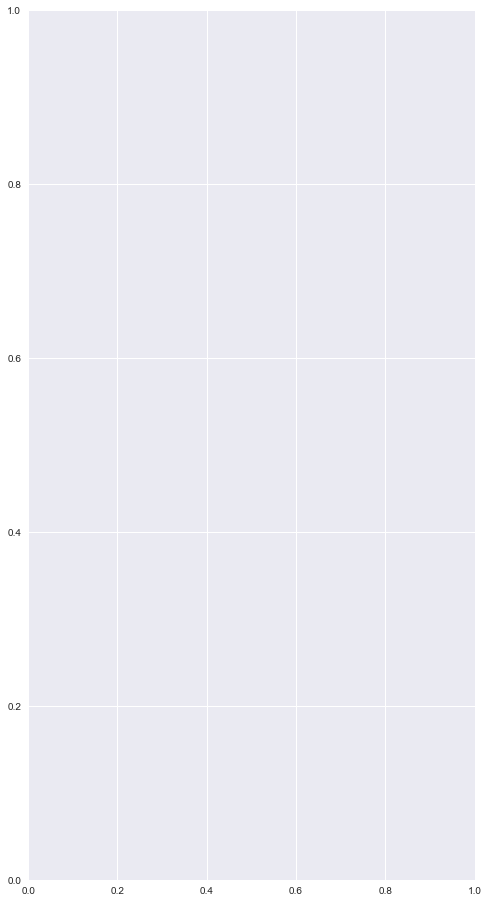

In [344]:
model = xgb.fit(x_train, y_train)
fig, ax = plt.subplots(1, 1, figsize=(8, 16))
xgb.plot_importance(model, max_num_features=50, height=0.5, ax=ax)

In [345]:
model

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)